In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import time
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

In [2]:
URL = 'https://www.imdb.com/search/title/?release_date=2000-01-01,2020-07-01'
page = requests.get(URL)

In [3]:
from requests import get
url = 'https://www.imdb.com/search/title/?release_date=2000-01-01,2020-07-01'
response = get(url)
#print(response.text[:500])

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [5]:
movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
50


In [6]:
names = []
years = []
imdb_ratings = []
votes = []

In [7]:
#Lists to store the scraped data in

In [8]:

for container in movie_containers:
    #if container.find('div', class_ = 'ratings-metascore') is not None:
    name = container.h3.a.text
    names.append(name)
# The year
    year = container.h3.find('span', class_ = 'lister-item-year').text
    years.append(year)
# The IMDB rating
    imdb = float(container.strong.text)
    imdb_ratings.append(imdb)

# The number of votes
    vote = container.find('span', attrs = {'name':'nv'})['data-value']
    votes.append(int(vote))


In [9]:
import pandas as pd
test_df = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'votes': votes
})
print(test_df.info())
test_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
movie    50 non-null object
year     50 non-null object
imdb     50 non-null float64
votes    50 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ KB
None


,movie,year,imdb,votes
0,Dark,(2017–2020),8.8,234126
1,Palm Springs,(2020),7.5,31345
2,Perry Mason,(2020– ),7.3,4618
3,Yellowstone,(2018– ),8.5,18626
4,365 dni,(2020),3.3,29923
5,Game of Thrones,(2011–2019),9.3,1694491
6,Eurovision Song Contest: The Story of Fire Saga,(2020),6.6,54354
7,Kingdom,(2014–2017),8.4,10752
8,The Boys,(2019– ),8.7,156046
9,The Office,(2005–2013),8.9,371562


In [10]:
pages = [str(i) for i in range(1,5)]
years_url = [str(i) for i in range(2000,2020)]

In [11]:
from time import sleep
from random import randint


In [12]:
from time import time
start_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    elapsed_time = time() - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))


Request: 1; Frequency: 0.33327516935095036 requests/s
Request: 2; Frequency: 0.33316153537255405 requests/s
Request: 3; Frequency: 0.4282157310333102 requests/s
Request: 4; Frequency: 0.3997225493769643 requests/s
Request: 5; Frequency: 0.4163259324603113 requests/s


In [13]:
from IPython.core.display import clear_output
start_time = time()
requests = 0
for _ in range(5):
# A request would go here
    requests += 1
    sleep(randint(1,3))
    current_time = time()
    elapsed_time = current_time - start_time
    print('Request: {}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
clear_output(wait = True)

Request: 1; Frequency: 0.3331670002066852 requests/s
Request: 2; Frequency: 0.4996826577950236 requests/s
Request: 3; Frequency: 0.5995037657799638 requests/s
Request: 4; Frequency: 0.6660534623198315 requests/s
Request: 5; Frequency: 0.5550970520950868 requests/s


In [14]:
headers = {"Accept-Language": "en-US, en;q=0.5"}

In [15]:
# Redeclaring the lists to store data in
names = []
years = []
imdb_ratings = []
metascores = []
votes = []

# Preparing the monitoring of the loop
start_time = time()
requests = 0

# For every year in the interval 2000-2017
for year_url in years_url:

    # For every page in the interval 1-4
    for page in pages:

        # Make a get request
        response = get('https://www.imdb.com/search/title/?release_date=2000-01-01,2020-07-01' + page, headers = headers)

        # Pause the loop
        sleep(randint(8,15))

        # Monitor the requests
        requests += 1
        elapsed_time = time() - start_time
        print('Request:{}; Frequency: {} requests/s'.format(requests, requests/elapsed_time))
        clear_output(wait = True)

        # Throw a warning for non-200 status codes
        if response.status_code != 200:
            warn('Request: {}; Status code: {}'.format(requests, response.status_code))

        # Break the loop if the number of requests is greater than expected
        if requests > 72:
            #warn('Number of requests was greater than expected.')
            break

        # Parse the content of the request with BeautifulSoup
        page_html = BeautifulSoup(response.text, 'html.parser')

        # Select all the 50 movie containers from a single page
        mv_containers = page_html.find_all('div', class_ = 'lister-item mode-advanced')

        # For every movie of these 50
        for container in mv_containers:
            # If the movie has a Metascore, then:
            if container.find('div', class_ = 'ratings-metascore') is not None:

                # Scrape the name
                name = container.h3.a.text
                names.append(name)

                # Scrape the year
                year = container.h3.find('span', class_ = 'lister-item-year').text
                years.append(year)

                # Scrape the IMDB rating
                imdb = float(container.strong.text)
                imdb_ratings.append(imdb)

                # Scrape the Metascore
                m_score = container.find('span', class_ = 'metascore').text
                metascores.append(int(m_score))

                # Scrape the number of votes
                vote = container.find('span', attrs = {'name':'nv'})['data-value']
                votes.append(int(vote))

Request:74; Frequency: 0.07452129691349989 requests/s


In [16]:
movie_ratings = pd.DataFrame({'movie': names,
'year': years,
'imdb': imdb_ratings,
'metascore': metascores,
'votes': votes
})
print(movie_ratings.info())
movie_ratings.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 5 columns):
movie        720 non-null object
year         720 non-null object
imdb         720 non-null float64
metascore    720 non-null int64
votes        720 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 28.2+ KB
None


,movie,year,imdb,metascore,votes
0,The Old Guard,(2020),6.7,70,77809
1,Greyhound,(2020),7.1,63,35951
2,Palm Springs,(2020),7.5,84,31345
3,Hamilton,(2020),8.8,90,30588
4,Eurovision Song Contest: The Story of Fire Saga,(2020),6.6,50,54354
5,Knives Out,(2019),7.9,82,357457
6,The Gentlemen,(2019),7.9,51,168636
7,Once Upon a Time... in Hollywood,(2019),7.7,83,497088
8,Love,(II) (2015),6.1,51,44954
9,The Outpost,(2020),6.7,71,6668


In [17]:
movie_ratings.shape

(720, 5)

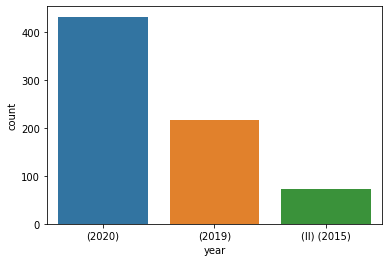

In [18]:
sns.countplot(movie_ratings.year)

We see that most of the films scraped lies in the year 2020 and 2019. Entries from (ii)2015 is a wrong entry as the special character is considered.